In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Database

In [2]:
df = pd.read_csv('healthcare-dataset-stroke-data.csv')
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


# Visualizing Data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [4]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [5]:
df.stroke.value_counts()

stroke
0    4861
1     249
Name: count, dtype: int64

In [6]:
# Dropping ID since it is irrelevant

df = df.drop(columns=['id'])

df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


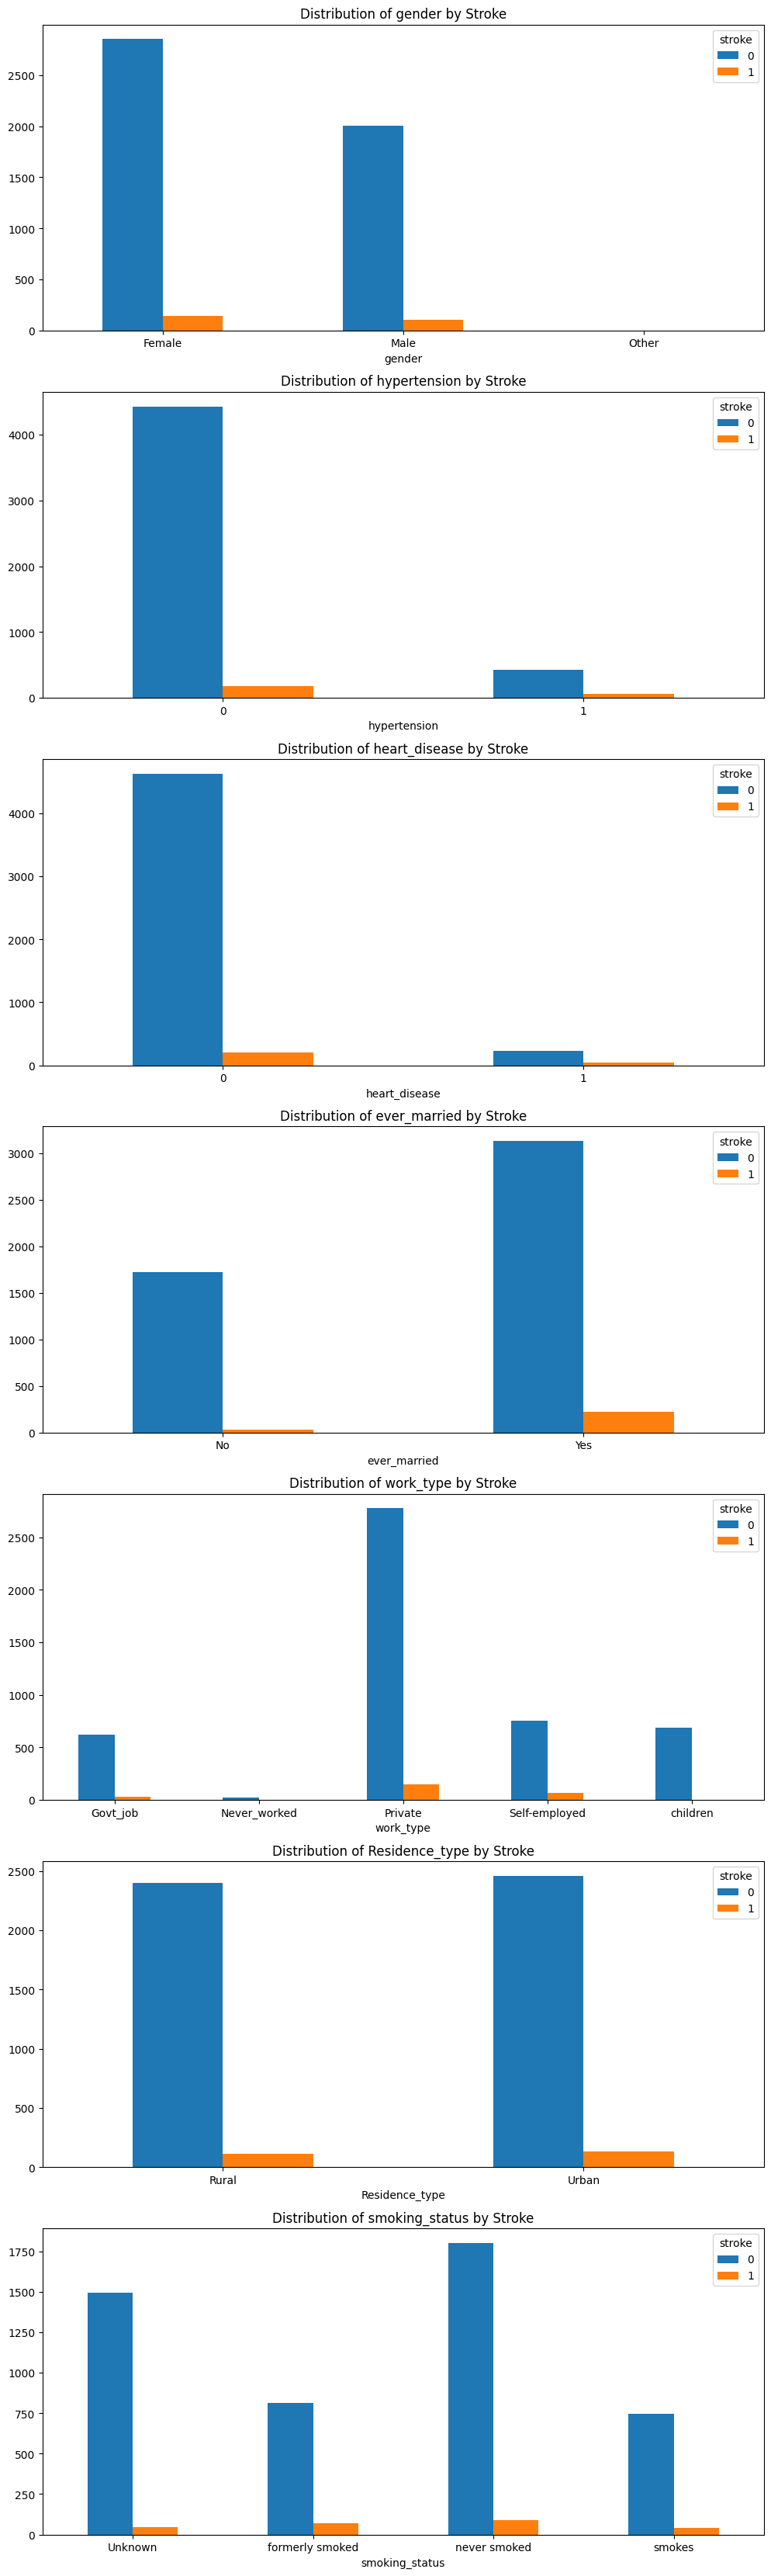

In [7]:
variables = ['gender','hypertension','heart_disease','ever_married','work_type','Residence_type','smoking_status']

n_vars = len(variables)
fig, axes = plt.subplots(nrows=n_vars, figsize=(12,6*n_vars))

for i, var in enumerate(variables):
    ax = axes[i]
    df_grp = df.groupby(var)['stroke'].value_counts().unstack().reset_index()
    df_grp.set_index(var).plot(kind='bar', ax=ax)
    ax.set_title(f'Distribution of {var} by Stroke')
    ax.set_xticklabels(ax.get_xticklabels(), rotation = 0)

In [8]:
df.work_type.value_counts()

work_type
Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: count, dtype: int64

In [9]:
df.heart_disease.value_counts()

heart_disease
0    4834
1     276
Name: count, dtype: int64

In [10]:
df.gender.value_counts()

gender
Female    2994
Male      2115
Other        1
Name: count, dtype: int64

# Removing Categorical Outliers

### AS the 'Never Worked and 'Other' attributes are very underrepresented, not even reaching 100, we will be removing them

In [11]:
df = df[df['gender'] != 'Other']

df.gender.value_counts()

gender
Female    2994
Male      2115
Name: count, dtype: int64

In [12]:
df = df[df['work_type'] != 'Never_worked']

df.work_type.value_counts()

work_type
Private          2924
Self-employed     819
children          687
Govt_job          657
Name: count, dtype: int64

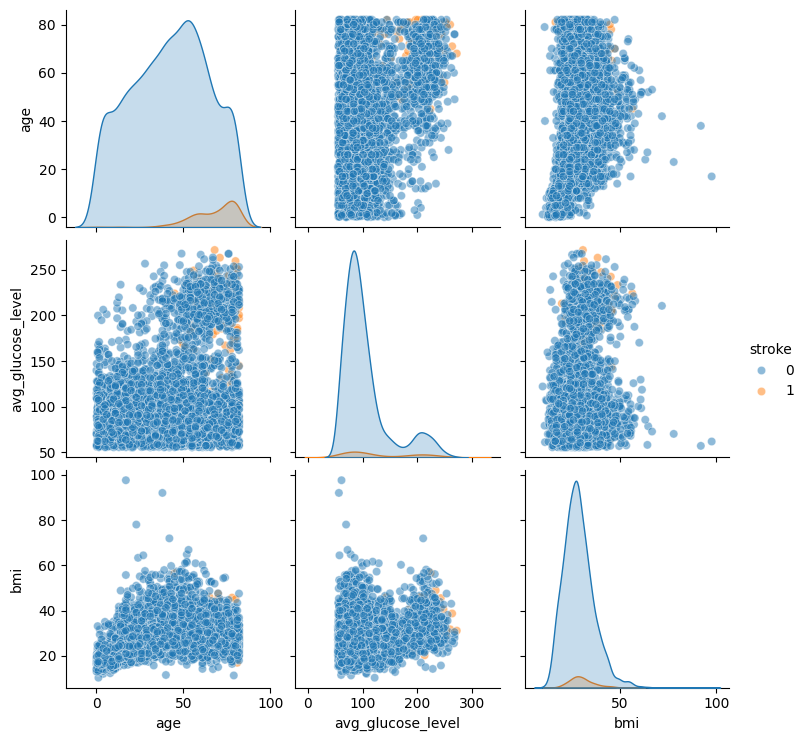

In [13]:
df_numeric = df[['age','avg_glucose_level','bmi','stroke']]

sns.pairplot(df_numeric, hue='stroke',plot_kws={'alpha': 0.5}, hue_order=[0,1])

plt.show()

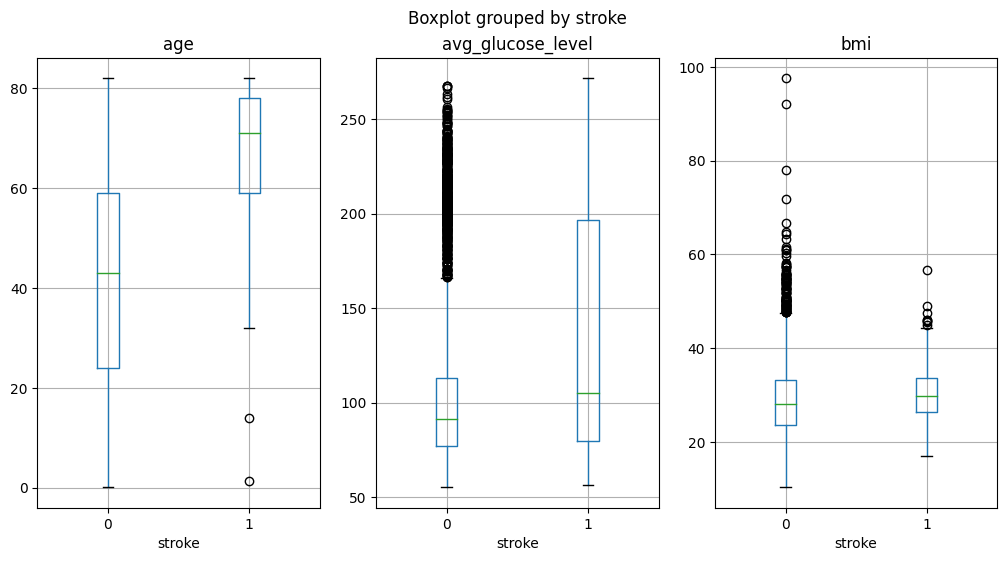

In [14]:
variables = ['age','avg_glucose_level','bmi']

n_vars = len(variables)

fig, axes = plt.subplots(ncols=n_vars, figsize=(12,6))



for i, var in enumerate(variables):
    ax = axes[i]
    df.boxplot(by='stroke', column=var, ax=ax)

# Numerical Outliers

In [15]:
def remove_outliers_iqr(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    mask = ~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)
    return df[mask]

# Separate DataFrames for each 'stroke' group
df_stroke_0 = df_numeric[df_numeric['stroke'] == 0]
df_stroke_1 = df_numeric[df_numeric['stroke'] == 1]

# Remove outliers within each group
df_stroke_0_no_outliers = remove_outliers_iqr(df_stroke_0)
df_stroke_1_no_outliers = remove_outliers_iqr(df_stroke_1)

# Combine the DataFrames back together
df_no_outliers = pd.concat([df_stroke_0_no_outliers, df_stroke_1_no_outliers])    

df_no_outliers.stroke.value_counts()

stroke
0    4204
1     239
Name: count, dtype: int64

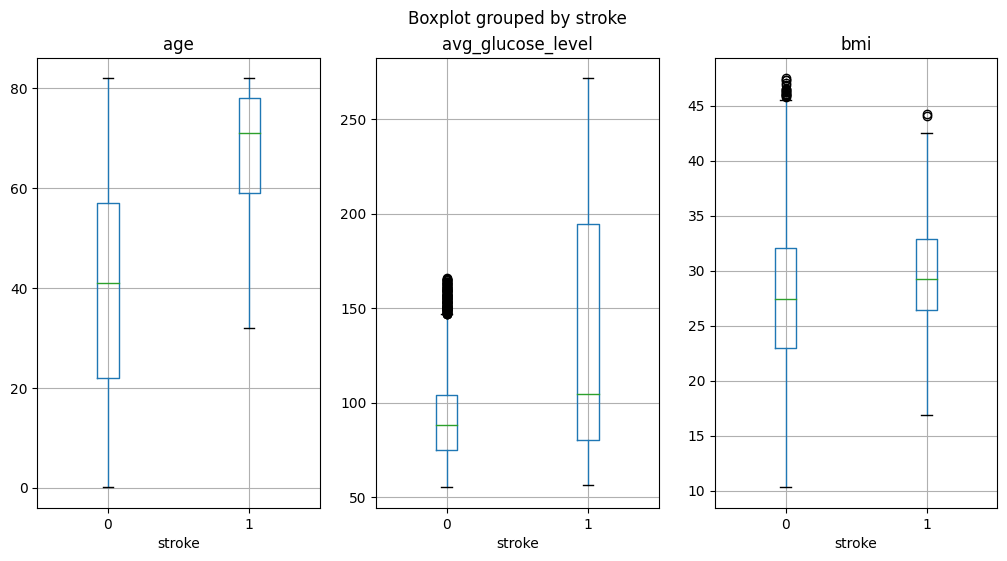

In [16]:
variables = ['age','avg_glucose_level','bmi']

n_vars = len(variables)

fig, axes = plt.subplots(ncols=n_vars, figsize=(12,6))



for i, var in enumerate(variables):
    ax = axes[i]
    df_no_outliers.boxplot(by='stroke', column=var, ax=ax)

In [17]:
df_combined = df.merge(df_no_outliers, on=['age', 'avg_glucose_level', 'bmi', 'stroke'], how='inner')
df.info()
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5087 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5087 non-null   object 
 1   age                5087 non-null   float64
 2   hypertension       5087 non-null   int64  
 3   heart_disease      5087 non-null   int64  
 4   ever_married       5087 non-null   object 
 5   work_type          5087 non-null   object 
 6   Residence_type     5087 non-null   object 
 7   avg_glucose_level  5087 non-null   float64
 8   bmi                4886 non-null   float64
 9   smoking_status     5087 non-null   object 
 10  stroke             5087 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 476.9+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4443 entries, 0 to 4442
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ge

In [18]:
df = df_combined

# BMI is missing some values

### To fill them, we'll be using linear regression, but we need to encode all of the categorical data first

In [19]:
# # Define a function to handle sorting, interpolation, and additional filling within each group
# def interpolate_and_fill_bmi(group):
#     group = group.sort_values('age')  # Sort by age within the group
#     # Perform linear interpolation followed by nearest neighbor interpolation
#     group['bmi'] = group['bmi'].interpolate(method='linear').interpolate(method='nearest')
#     # If there are still NaNs, fill them using the mean of the group
#     if group['bmi'].isna().any():
#         group_mean = group['bmi'].mean()
#         group['bmi'] = group['bmi'].fillna(group_mean)
#     return group

# # Apply the function to each gender group
# interpolated = df.groupby('gender').apply(interpolate_and_fill_bmi)

# # Reset index to avoid a multi-level index after grouping
# interpolated.reset_index(drop=True, inplace=True)

# # Assign the interpolated 'bmi' values back to the main DataFrame using the original DataFrame's index
# df['bmi'] = interpolated['bmi']

# df['bmi'] = df['bmi'].fillna(df['bmi'].mean())



In [20]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df['gender'] = le.fit_transform(df['gender'])
df['ever_married'] = le.fit_transform(df['ever_married'])
df['Residence_type'] = le.fit_transform(df['Residence_type'])

df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,Private,1,228.69,36.6,formerly smoked,1
1,0,61.0,0,0,1,Self-employed,0,202.21,NaN,never smoked,1
2,1,80.0,0,1,1,Private,0,105.92,32.5,never smoked,1
3,0,49.0,0,0,1,Private,1,171.23,34.4,smokes,1
4,0,79.0,1,0,1,Self-employed,0,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
4438,0,13.0,0,0,0,children,0,103.08,18.6,Unknown,0
4439,0,80.0,1,0,1,Private,1,83.75,NaN,never smoked,0
4440,0,81.0,0,0,1,Self-employed,1,125.20,40.0,never smoked,0
4441,0,35.0,0,0,1,Self-employed,0,82.99,30.6,never smoked,0


In [21]:
df = pd.get_dummies(df, columns=['work_type','smoking_status'], dtype=int)

df

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,work_type_Govt_job,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,1,67.0,0,1,1,1,228.69,36.6,1,0,1,0,0,0,1,0,0
1,0,61.0,0,0,1,0,202.21,NaN,1,0,0,1,0,0,0,1,0
2,1,80.0,0,1,1,0,105.92,32.5,1,0,1,0,0,0,0,1,0
3,0,49.0,0,0,1,1,171.23,34.4,1,0,1,0,0,0,0,0,1
4,0,79.0,1,0,1,0,174.12,24.0,1,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4438,0,13.0,0,0,0,0,103.08,18.6,0,0,0,0,1,1,0,0,0
4439,0,80.0,1,0,1,1,83.75,NaN,0,0,1,0,0,0,0,1,0
4440,0,81.0,0,0,1,1,125.20,40.0,0,0,0,1,0,0,0,1,0
4441,0,35.0,0,0,1,0,82.99,30.6,0,0,0,1,0,0,0,1,0


In [22]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

df[['age','avg_glucose_level','bmi']] = scaler.fit_transform(df[['age','avg_glucose_level','bmi']])

df

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,work_type_Govt_job,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,1,0.816895,0,1,1,1,0.801265,0.706989,1,0,1,0,0,0,1,0,0
1,0,0.743652,0,0,1,0,0.679023,NaN,1,0,0,1,0,0,0,1,0
2,1,0.975586,0,1,1,0,0.234512,0.596774,1,0,1,0,0,0,0,1,0
3,0,0.597168,0,0,1,1,0.536008,0.647849,1,0,1,0,0,0,0,0,1
4,0,0.963379,1,0,1,0,0.549349,0.368280,1,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4438,0,0.157715,0,0,0,0,0.221402,0.223118,0,0,0,0,1,1,0,0,0
4439,0,0.975586,1,0,1,1,0.132167,NaN,0,0,1,0,0,0,0,1,0
4440,0,0.987793,0,0,1,1,0.323516,0.798387,0,0,0,1,0,0,0,1,0
4441,0,0.426270,0,0,1,0,0.128658,0.545699,0,0,0,1,0,0,0,1,0


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4443 entries, 0 to 4442
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   gender                          4443 non-null   int32  
 1   age                             4443 non-null   float64
 2   hypertension                    4443 non-null   int64  
 3   heart_disease                   4443 non-null   int64  
 4   ever_married                    4443 non-null   int32  
 5   Residence_type                  4443 non-null   int32  
 6   avg_glucose_level               4443 non-null   float64
 7   bmi                             4293 non-null   float64
 8   stroke                          4443 non-null   int64  
 9   work_type_Govt_job              4443 non-null   int32  
 10  work_type_Private               4443 non-null   int32  
 11  work_type_Self-employed         4443 non-null   int32  
 12  work_type_children              44

In [24]:
from sklearn.linear_model import LinearRegression

train_data = df[df['bmi'].notnull()]  
test_data = df[df['bmi'].isnull()]

X_train = train_data.drop(columns=['bmi','stroke'])
y_train = train_data['bmi']
X_test = test_data.drop(columns=['bmi','stroke'])

model = LinearRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

df.loc[df['bmi'].isnull(), 'bmi'] = y_pred


In [25]:
from sklearn.metrics import mean_squared_error

MSE = mean_squared_error(y_train, model.predict(X_train))

print(MSE)

0.02349319708116657


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4443 entries, 0 to 4442
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   gender                          4443 non-null   int32  
 1   age                             4443 non-null   float64
 2   hypertension                    4443 non-null   int64  
 3   heart_disease                   4443 non-null   int64  
 4   ever_married                    4443 non-null   int32  
 5   Residence_type                  4443 non-null   int32  
 6   avg_glucose_level               4443 non-null   float64
 7   bmi                             4443 non-null   float64
 8   stroke                          4443 non-null   int64  
 9   work_type_Govt_job              4443 non-null   int32  
 10  work_type_Private               4443 non-null   int32  
 11  work_type_Self-employed         4443 non-null   int32  
 12  work_type_children              44

In [27]:
df.stroke.value_counts()

stroke
0    4204
1     239
Name: count, dtype: int64

In [28]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

classifier = SVC()

X = df.drop(columns=['stroke'])
y = df['stroke']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)

X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

classifier.fit(X_train_res, y_train_res)

y_pred = classifier.predict(X_test)

print(X_train_res.shape[0], y_train_res.shape[0])


5900 5900


<Axes: >

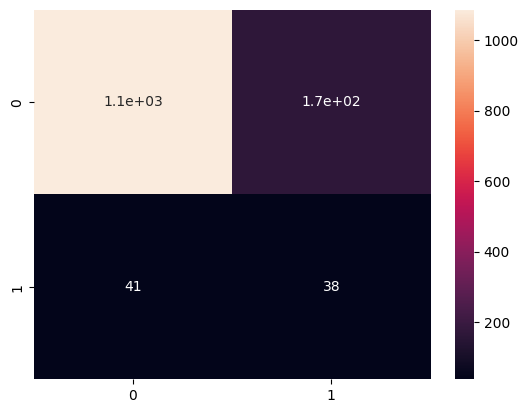

In [29]:
from sklearn.metrics import classification_report, confusion_matrix

# print(confusion_matrix(y_test, y_pred))

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)

In [30]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.87      0.91      1254
           1       0.18      0.48      0.27        79

    accuracy                           0.84      1333
   macro avg       0.57      0.67      0.59      1333
weighted avg       0.92      0.84      0.87      1333



In [31]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier()

classifier.fit(X_train_res, y_train_res)

y_pred = classifier.predict(X_test)


<Axes: >

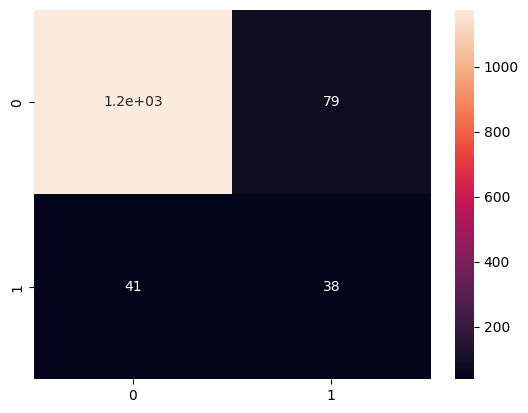

In [32]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)

In [33]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.94      0.95      1254
           1       0.32      0.48      0.39        79

    accuracy                           0.91      1333
   macro avg       0.65      0.71      0.67      1333
weighted avg       0.93      0.91      0.92      1333



              precision    recall  f1-score   support

           0       0.97      0.85      0.90      1254
           1       0.20      0.62      0.30        79

    accuracy                           0.83      1333
   macro avg       0.59      0.73      0.60      1333
weighted avg       0.93      0.83      0.87      1333



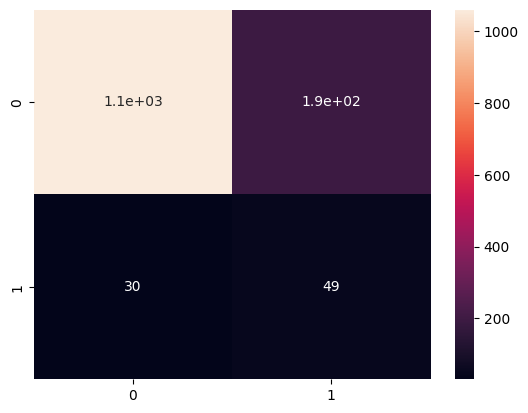

In [34]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression()

classifier.fit(X_train_res, y_train_res)

y_pred = classifier.predict(X_test)

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)

print(classification_report(y_test, y_pred))

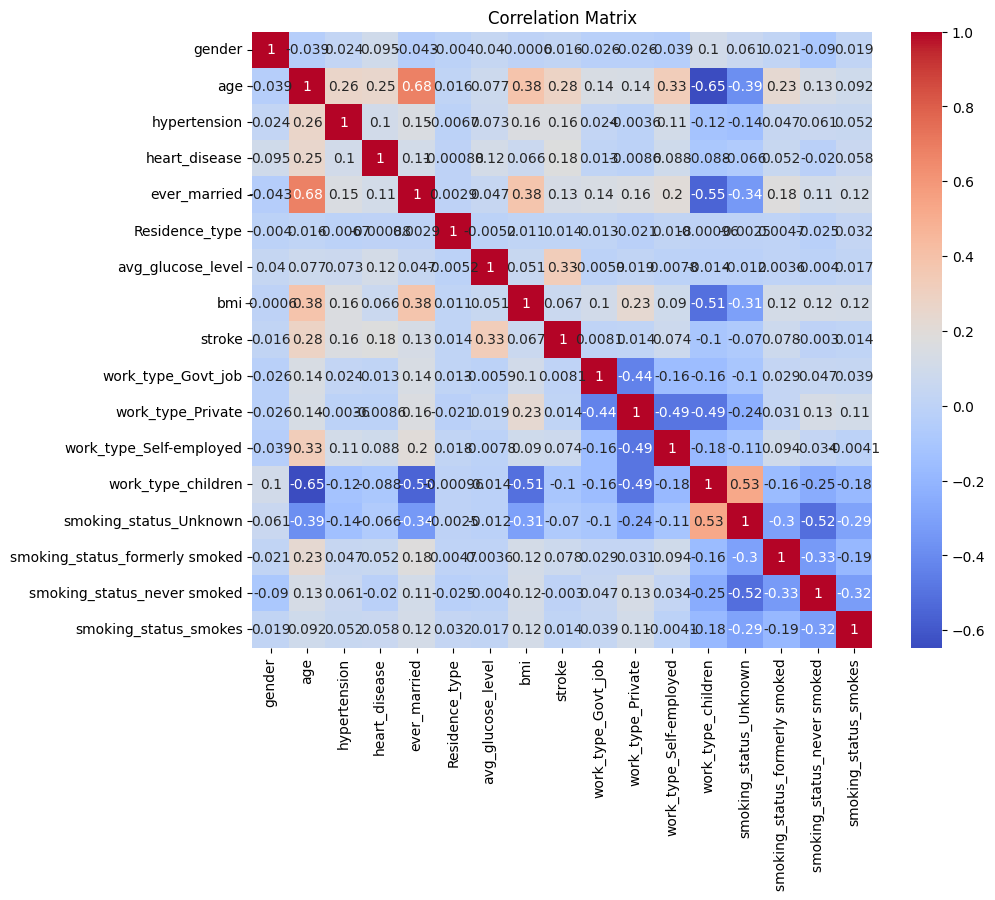

In [37]:
import seaborn as sns

# correlation matrix

correlation_matrix = df.corr()

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()